# Laboratorio 4.1: Clustering I

**Autores:** Fran Zautzik

**Fecha:** Octubre 2023

## ============= Declaración de compromiso ético =============

Nosotros ****Martín Bravo y Felipe Avendaño**** , declaramos que realizamos de manera grupal los pasos de la presente actividad. También declaramos no incurrir en copia, ni compartir nuestras respuestas con otras personas ni con otros grupos. Por lo que, ratificamos que las respuestas son de nuestra propia confección y reflejan nuestro propio conocimiento.


# Instrucciones


1. Trabajen en equipos de dos personas. Salvo excepciones, no se corregirá entregas con menos de dos integrantes.

2. Modifiquen este archivo `.ipynb` agregando sus respuestas donde corresponda.

3. Cuando finalicen el laboratorio, **generen un archivo HTML** usando jupyter (ver tutorial 3) y súbanlo a U-Cursos. El laboratorio debe ser entregado sólo por 1 integrante. Si se entrega por más de un integrante, se revisará cualquiera de éstos.

Para esta Laboratorio vamos usar dos métodos de clustering, K-means y DBSCAN, sobre el clásico dataset de flores Iris. Note que normalmente hacer clustering sobre datos de los que ya sabemos las clases (en este caso la especiede flor) no hace sentido, sin embargo usaremos este dataset para encontrar dichos grupos de manera no supervisada a modo de ejemplo.

Ejecute las siguientes celdas para importar el dataset iris desde sci-kit learn.

In [109]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

iris = datasets.load_iris()
df = pd.DataFrame(data=iris.data, columns=['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth'])
df['Species'] = iris.target

Ahora inspecionamos rapidamente los datos y su estructura:

In [110]:
df.sample(5)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
74,6.4,2.9,4.3,1.3,1
87,6.3,2.3,4.4,1.3,1
114,5.8,2.8,5.1,2.4,2
16,5.4,3.9,1.3,0.4,0
119,6.0,2.2,5.0,1.5,2


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

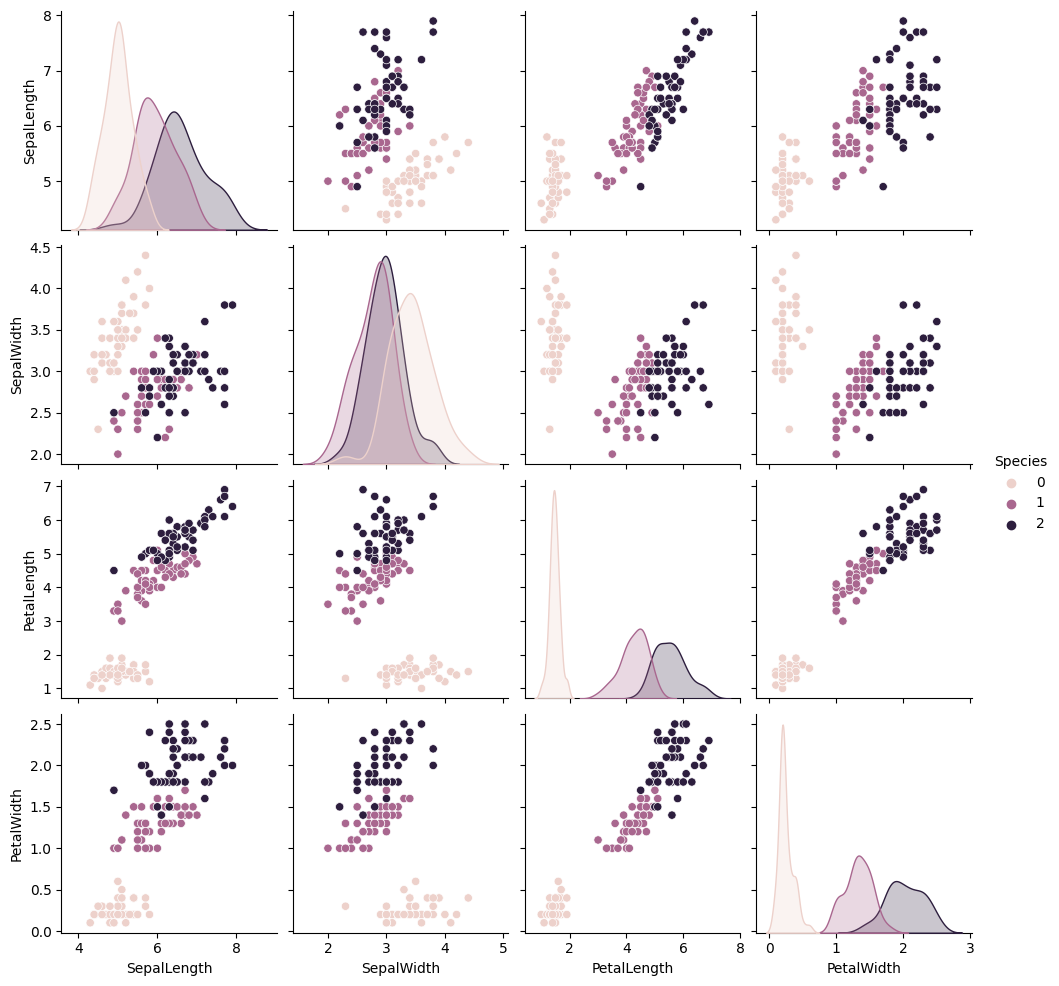

In [111]:
import seaborn as sns

sns.pairplot(df, hue='Species')

Y ahora definimos el conjunto de de datos solo con los atributos a usar mas adelante en el clustering.

In [112]:
X = df.drop('Species', axis=1)

**1.** Importe y ejecute sobre los datos el algoritmo K-means. Use el parametro `n_clusters=3`.

In [114]:
#Respuesta
from sklearn.cluster import KMeans
import numpy as np


# Modelo
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
X_kmeans =  kmeans.predict(X)


# Centroides
centroids = kmeans.cluster_centers_

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


**2.** Importe y ejecute sobre los datos el algoritmo DBSCAN. Use los parametros por defecto.

In [115]:
#Respuesta
# DBSCAN
from sklearn.cluster import DBSCAN

# Modelo
dbscan = DBSCAN()
dbscan.fit(X)
X_dbscan = dbscan.fit_predict(X)

**3.** Aplique PCA sobre los datos para reducir la dimensionalidad a 2.

In [116]:
# Respuesta

# PCA
from sklearn.decomposition import PCA

# Modelo
pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)

X_especie = df['Species']

**4.** Haga tres scatterplot de los datos reducidos. En uno coloree cada ejemplo según la especie, en otro segun los clusters generados por K-means y es otro segun los clusters generados por DBSCAN.

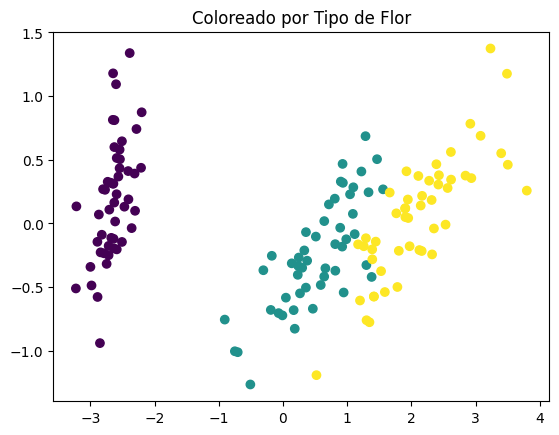

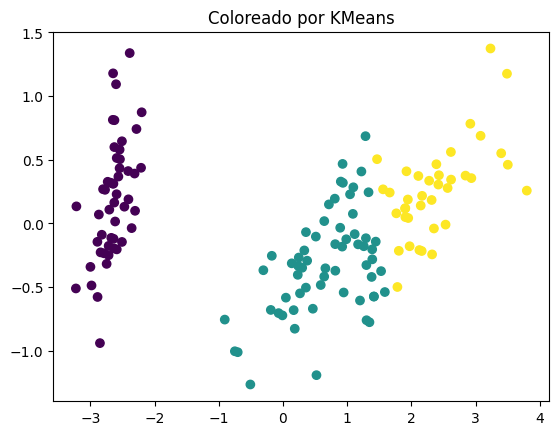

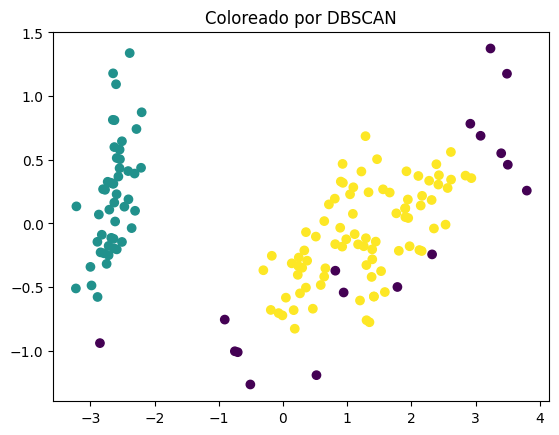

In [117]:
#Respuesta

# Coloreando segun especie
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=X_especie)
plt.title("Coloreado por Tipo de Flor")
plt.show()

# Coloreando segun kmeans
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=X_kmeans)
plt.title("Coloreado por KMeans")
plt.show()

# Coloreando segun dbscan
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=X_dbscan)
plt.title("Coloreado por DBSCAN")
plt.show()


**6.** Responda ¿Porque los resultados obtenidos con ambos modelos son diferentes y cual captura mejor las especies? Justifique mencionando la estructura que tienen los grupos y como funcionan los algoritmos.

Respuesta:



Los resultados obtenidos por ambos modelos son diferentes debido a que su algoritmo funciona de forma distinta, se puede ver claramente que el algoritmo de _K-Means_ se acerca mas a la realidad, ya que los grupos que se forman son mas parecidos a los grupos de especies que se tienen, en cambio el algoritmo de _DBSCAN_ no logra formar grupos que se asemejen a los grupos de especies, esto se debe a que el algoritmo de _DBSCAN_ funciona de forma distinta, ya que este algoritmo busca puntos que esten cerca de otros puntos, y si estos puntos estan cerca de otros puntos, se forma un grupo, en cambio el algoritmo de _K-Means_ busca puntos que esten cerca de un centroide, y si estos puntos estan cerca de un centroide, se forma un grupo, por lo que el algoritmo de _K-Means_ se acerca mas a la realidad, ya que los grupos que se forman son mas parecidos a los grupos de especies que se tienen.